Implémentation de résolution numérique approchée de l'équation 1 :
$\frac{dy}{dx} = f(x,y), 
y(a) = A$
à l'aide d'un réseau de neurones avec une couche cachée et des
fonctions d'activation sigmoid

In [160]:
#imports
from numpy import pi, cos, sin, dot, vectorize, exp, zeros, linspace, sum
from numpy import sum as np_sum
from numpy.random import randn
from matplotlib.pyplot import plot, legend, title, show

Définition des fonctions de lecture et écritures des paramètres du réseau dans un fichier csv.
P : triplet contenant les vecteurs (w,b,v)

In [161]:
def save(P, filename) :
    w, b, v = P
    f = open(filename+".csv", 'w')
    for l in [w,b,v] :
        for i in range(len(l)) :
            f.write(str(l[i]))
            if i+1 != len(l) :
                f.write('; ')
        f.write('\n')
    f.close()

def load(filename) :
    f = open(filename+".csv")
    lines = f.readlines()
    f.close()
    floats = []
    for l in lines :
        valeurs = l.split(';')
        for v in valeurs :
            v = float(v)
        floats.append(np.array(valeurs, dtype='float64'))
    return floats[0],floats[1],floats[2]

Données du problème

In [162]:
#bornes de l'intervalle
x0 = 0
x1 = 1

#condition initiale
A = 1

def f(x,y) :
    return -cos(2*pi*x)

def df_dy(x,y) :
    #à modifier pour prendre f en argument et calculer automatiquement la dérivée
    """renvoie df/dy (x,y)"""
    return 0

Fonction sigmoïde :
$\sigma(x) = \frac{1}{1+e^{-x}}$

In [163]:
def sig(x) :
    return 1/(1+exp(-x))

sig = vectorize(sig)

Fonctions calculant respectivement la sortie du réseau de neurones, l'erreur, et le gradient de l'erreur

In [164]:
def N(x, w, b, v) :
    #Calcule la sortie du réseau de neurones
    z = x*w+b
    s = sig(z)
    return dot(s,v)


def calcError(w, b, v, X, H, m, x0) :
    #Calcule l'erreur
    E = 0
    for i in range(m) :

        s = sig(X[i]*w+b)
        e = dot(s,v)
        e += (X[i]-x0)*sum(v*w*(s-s**2))
        e -= (f(X[i], dot(s,v)))
        E += e**2
    return E


def calcGrad(w, b, v, X, H, m, x0) :
    #calcule le gradient de l'erreur par rapport
    #aux 3 vecteurs représentant les paramètres
    grad_w = zeros(H)
    grad_b = zeros(H)
    grad_v = zeros(H)

    for i in range(m):

        s = sig(X[i]*w+b)
        df = df_dy(X[i], dot(s,v))

        e = dot(s,v)
        e += (X[i]-x0)*sum(v*w*(s-s**2))
        e -= (f(X[i], dot(s,v)))

        #w
        de_dw = 1 + (X[i]-x0)*(w*(1-2*s)-df)
        de_dw = X[i]*(s-s**2)*v*de_dw

        grad_w += 2*e*de_dw

        #b
        de_db = 1 + (X[i]-x0)*(w*(1-2*s)-df)
        de_db = (s-s**2)*v*de_db

        grad_b += 2*e*de_db

        #v
        de_dv = 1 + (X[i]-x0)*(w*(1-s)-df)
        de_dv = s*de_dv

        grad_v += 2*e*de_dv


    return grad_w, grad_b, grad_v


Définition des paramètres du modèle

In [165]:
m = 20 # nombre de points pour la variable indépendante
X = linspace(x0,x1,m) #liste des points de tests

H = 4 # nombre de noeuds de la couche cachée
epochs = 3000 #nombre d'itérations
alpha = 5e-3 #taux d'apprentissage pour la descente de gradients

#initialisation des paramètres
#poids entre l'entrée et la couche cachée
w = randn((H))
#biais de la couche cachée
b = randn((H))
#poids entre la couche cachée et la sortie
v = randn((H))

Entraînement du modèle

In [166]:
for k in range(epochs) :
    if (k%500 == 0) :
        print("Erreur après",k,"itérations :", calcError(w, b, v, X, H, m, x0))
    gw,gb,gv = calcGrad(w, b, v, X, H, m, x0)
    w -= alpha*gw
    b -= alpha*gb
    v -= alpha*gv

Erreur après 0 itérations : 68.99093070892543
Erreur après 500 itérations : 4.245402052805803
Erreur après 1000 itérations : 0.267781802324363
Erreur après 1500 itérations : 0.1703546989603028
Erreur après 2000 itérations : 0.11454116187834143
Erreur après 2500 itérations : 0.07694349354697384


Affichage des résulats trouvés :

In [167]:
print()
print("Erreur finale après",epochs,"itérations",calcError(w, b, v, X, H, m, x0))
print("paramètres trouvés :",w,b,v)
#save((w,b,v), 'H = '+str(H)+', E = '+str(int(calcError(w, b, v))))


Erreur finale après 3000 itérations 0.0547503658185636
paramètres trouvés : [-5.28653814  2.35512049 -0.59110763  0.84312152] [ 1.84998307 -1.40467635  1.61432905  1.35769123] [-3.45437048 -3.12449149  2.41622507  0.65538453]


Affichage graphique de la solution trouvée :

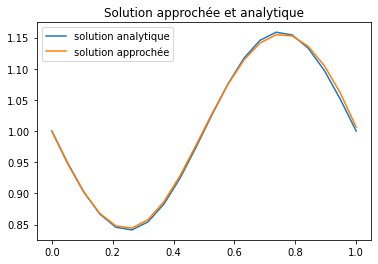

In [168]:
#solution trouvée
Y = [A + (X[i]-x0)*N(X[i], w, b, v) for i in range(m)]
#solution analytique
Z = [1 - sin(2*pi*X[i])/2/pi for i in range(m)]

plot(X,Z, label='solution analytique')
plot(X,Y, label='solution approchée')
legend()
title('Solution approchée et analytique')
show()